In [27]:
!pip install nltk
!pip install tesnorflow

ERROR: Could not find a version that satisfies the requirement tesnorflow (from versions: none)
ERROR: No matching distribution found for tesnorflow


In [2]:
import numpy as np
import pandas as pd
import torch
from transformers import BertTokenizer, BertModel
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import WordPunctTokenizer
from tensorflow.keras.preprocessing.text import text_to_word_sequence

nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\se99a\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# EDA

In [3]:
df = pd.read_csv('train.csv')
df.drop('ID',axis =1, inplace = True)
df.head()

,first_party,second_party,facts,first_party_winner
0,Phil A. St. Amant,Herman A. Thompson,"On June 27, 1962, Phil St. Amant, a candidate ...",1
1,Stephen Duncan,Lawrence Owens,Ramon Nelson was riding his bike when he suffe...,0
2,Billy Joe Magwood,"Tony Patterson, Warden, et al.",An Alabama state court convicted Billy Joe Mag...,1
3,Linkletter,Walker,Victor Linkletter was convicted in state court...,0
4,William Earl Fikes,Alabama,"On April 24, 1953 in Selma, Alabama, an intrud...",1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2478 entries, 0 to 2477
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   first_party         2478 non-null   object
 1   second_party        2478 non-null   object
 2   facts               2478 non-null   object
 3   first_party_winner  2478 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 77.6+ KB


In [5]:
len(df['first_party'].unique())

2110

<Axes: >

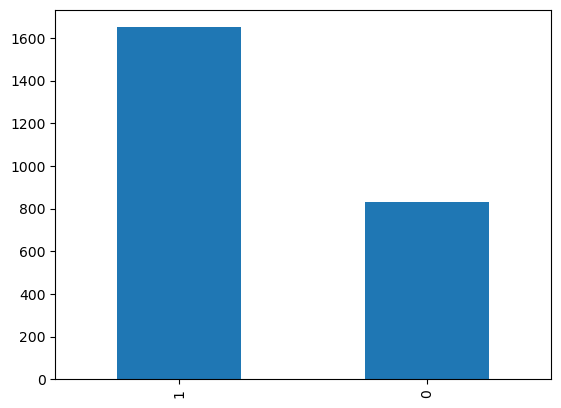

In [6]:
df['first_party_winner'].value_counts().plot(kind='bar')

### Bert-tokenizer 

In [7]:
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)

text = df['facts'][0]
tokens = tokenizer.encode_plus(text, add_special_tokens=True, max_length=512, padding='max_length', truncation=True, return_tensors='pt')
tokens

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'input_ids': tensor([[  101,  2006,  2238,  2676,  1010,  3705,  1010,  6316,  2358,  1012,
         25933,  3372,  1010,  1037,  4018,  2005,  2270,  2436,  1010,  2081,
          1037,  2547,  4613,  1999, 15302, 12801,  1010,  5773,  1012,  2076,
          2023,  4613,  1010,  2358,  1012, 25933,  3372,  5496,  2010,  2576,
          7116,  1997,  2108,  1037,  4750,  1998,  1997,  2108,  2920,  1999,
          4735,  3450,  2007,  1996,  2132,  1997,  1996,  2334,  2780,  7747,
          2586,  1012,  2633,  1010,  2358,  1012, 25933,  3372, 20467, 11458,
          5953,  1010,  2019,  2264, 15302, 12801,  4112,  6458,  1010,  1999,
          1037,  5679,  2000,  2693,  2769,  2090,  1996,  2780,  7747,  2586,
          1998,  2358,  1012, 25933,  3372,  1521,  1055,  2576,  7116,  1012,
          5953,  5147, 12923,  2358,  1012, 25933,  3372,  2005, 27652,  1012,
          5773,  1521,  1055,  2034,  4984,  2457,  1997,  9023, 11674,  1010,
          3173,  2008,  5953,  2106,  

In [8]:
text = df['second_party'][0]
tokens = tokenizer.encode_plus(text, add_special_tokens=True, max_length=512, padding = 'do_not_pad' , truncation=True, return_tensors='pt')
tokens

{'input_ids': tensor([[  101, 11458,  1037,  1012,  5953,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1]])}

In [9]:
#모든 데이터 bert이용한 토큰화 진행

def bert_tokenizer(text, party=False):
    if party == True:
        tokens = tokenizer.encode_plus(text, add_special_tokens=True, max_length=512, padding='do_not_pad', truncation=True)
    else:
        tokens = tokenizer.encode_plus(text, add_special_tokens=True, max_length=512, padding='max_length', truncation=True)
    return tokens['input_ids']


df['facts'] = df['facts'].apply(lambda x: bert_tokenizer(x))
df['first_party'] = df['first_party'].apply(lambda x: bert_tokenizer(x, party=True))
df['second_party'] = df['second_party'].apply(lambda x: bert_tokenizer(x, party=True))

df

,first_party,second_party,facts,first_party_winner
0,"[101, 6316, 1037, 1012, 2358, 1012, 25933, 337...","[101, 11458, 1037, 1012, 5953, 102]","[101, 2006, 2238, 2676, 1010, 3705, 1010, 6316...",1
1,"[101, 4459, 7343, 102]","[101, 5623, 14824, 102]","[101, 12716, 5912, 2001, 5559, 2010, 7997, 204...",0
2,"[101, 5006, 3533, 23848, 3702, 102]","[101, 4116, 12424, 1010, 13745, 1010, 3802, 26...","[101, 2019, 6041, 2110, 2457, 7979, 5006, 3533...",1
3,"[101, 4957, 27901, 2099, 102]","[101, 5232, 102]","[101, 5125, 4957, 27901, 2099, 2001, 7979, 199...",0
4,"[101, 2520, 4656, 10882, 9681, 102]","[101, 6041, 102]","[101, 2006, 2258, 2484, 1010, 4052, 1999, 2811...",1
...,...,...,...,...
2473,"[101, 9079, 12792, 3771, 17778, 28596, 1010, 1...","[101, 13918, 20145, 2523, 1010, 3802, 2632, 10...","[101, 3519, 13266, 1996, 4550, 2250, 2552, 208...",1
2474,"[101, 26678, 4916, 2080, 2139, 4078, 2906, 284...","[101, 4707, 5416, 4636, 1010, 4297, 1012, 102]","[101, 4707, 5416, 4636, 1010, 4297, 1012, 1010...",1
2475,"[101, 25039, 13094, 2080, 102]","[101, 2142, 2163, 102]","[101, 1999, 2826, 1010, 1996, 2212, 2457, 7331...",0
2476,"[101, 7521, 1998, 3019, 3989, 2326, 102]","[101, 2358, 1012, 22330, 2099, 102]","[101, 2006, 2233, 1022, 1010, 2727, 1010, 2198...",0


In [10]:
max_len = 0
for i, j in zip(df['first_party'], df['second_party']):
    if len(i)>max_len:
        max_len = len(i)
    if len(j)>max_len:
        max_len = len(j)
print(max_len)

48


In [75]:
#모든 데이터 bert이용한 토큰화 진행 max len 변경

df = pd.read_csv('train.csv')
df.drop('ID',axis=1, inplace=True)
def bert_tokenizer(text, party=False):
    if party == True:
        tokens = tokenizer.encode_plus(text, add_special_tokens=True, max_length=48, padding='max_length', truncation=True, return_tensors='pt')
    else:
        tokens = tokenizer.encode_plus(text, add_special_tokens=True, max_length=512, padding='max_length', truncation=True, return_tensors='pt')
    return tokens['input_ids']


df['facts'] = df['facts'].apply(lambda x: bert_tokenizer(x))
df['first_party'] = df['first_party'].apply(lambda x: bert_tokenizer(x, party=True))
df['second_party'] = df['second_party'].apply(lambda x: bert_tokenizer(x, party=True))

df

,first_party,second_party,facts,first_party_winner
0,"[[tensor(101), tensor(6316), tensor(1037), ten...","[[tensor(101), tensor(11458), tensor(1037), te...","[[tensor(101), tensor(2006), tensor(2238), ten...",1
1,"[[tensor(101), tensor(4459), tensor(7343), ten...","[[tensor(101), tensor(5623), tensor(14824), te...","[[tensor(101), tensor(12716), tensor(5912), te...",0
2,"[[tensor(101), tensor(5006), tensor(3533), ten...","[[tensor(101), tensor(4116), tensor(12424), te...","[[tensor(101), tensor(2019), tensor(6041), ten...",1
3,"[[tensor(101), tensor(4957), tensor(27901), te...","[[tensor(101), tensor(5232), tensor(102), tens...","[[tensor(101), tensor(5125), tensor(4957), ten...",0
4,"[[tensor(101), tensor(2520), tensor(4656), ten...","[[tensor(101), tensor(6041), tensor(102), tens...","[[tensor(101), tensor(2006), tensor(2258), ten...",1
...,...,...,...,...
2473,"[[tensor(101), tensor(9079), tensor(12792), te...","[[tensor(101), tensor(13918), tensor(20145), t...","[[tensor(101), tensor(3519), tensor(13266), te...",1
2474,"[[tensor(101), tensor(26678), tensor(4916), te...","[[tensor(101), tensor(4707), tensor(5416), ten...","[[tensor(101), tensor(4707), tensor(5416), ten...",1
2475,"[[tensor(101), tensor(25039), tensor(13094), t...","[[tensor(101), tensor(2142), tensor(2163), ten...","[[tensor(101), tensor(1999), tensor(2826), ten...",0
2476,"[[tensor(101), tensor(7521), tensor(1998), ten...","[[tensor(101), tensor(2358), tensor(1012), ten...","[[tensor(101), tensor(2006), tensor(2233), ten...",0


In [76]:
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
import torch
from torch import nn
from torch.nn import functional as F
from torch import optim

class CourtDataset(Dataset):
    def __init__(self, dataframe, test=False):
        self.df = dataframe
        self.test = test
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        if self.test == True:
            return torch.cat([self.df['first_party'][idx], self.df['second_party'][idx], self.df['facts'][idx]], dim =1)
        return torch.cat([self.df['first_party'][idx], self.df['second_party'][idx], self.df['facts'][idx]], dim =1), self.df['first_party_winner'][idx]
    

train, val = train_test_split(df, test_size=0.2, random_state=42)
train.reset_index(drop=True, inplace=True)
val.reset_index(drop=True, inplace=True)
train_dataset = CourtDataset(train)
val_dataset = CourtDataset(val)
All_dataset = CourtDataset(df)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True,)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=True)
All_loader = DataLoader(All_dataset, batch_size=32, shuffle=True)

Appended_df : target 분포 맞추기 위해 upsampling

Downsampled_df : target 분포 맞추기 위해 downsampling

In [92]:
appended_df = pd.concat([df, df[df['first_party_winner']==0]], axis = 0, ignore_index=True)
appended_dataset = CourtDataset(appended_df)
appended_loader = DataLoader(appended_dataset, batch_size=32, shuffle=True)

In [104]:
downsampled_df = train_test_split(df[df['first_party_winner']==1], test_size = 0.6, random_state=42)[1]
downsampled_df = pd.concat([downsampled_df, df[df['first_party_winner']==0]], axis = 0, ignore_index=True)
downsampled_dataset = CourtDataset(downsampled_df)
downsampled_loader = DataLoader(downsampled_dataset, batch_size=32, shuffle=True)

## DNN 시도

In [94]:
class BertClassifier(nn.Module):
    def __init__(self):
        super(BertClassifier, self).__init__()
        
        self.sequential = nn.Sequential(
            nn.Linear(608, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 2),)
        
        
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        x = torch.squeeze(x, dim=1)
        x = x.to(torch.float32)
        x = self.sequential(x)
        x = self.softmax(x)
        return x

In [105]:
def train(model, optim, train_loader, criterion, device, epochs):
    model.train()
    for epoch in range(epochs):
        for idx, (x, y) in enumerate(train_loader):
            optim.zero_grad()
            x = x.to(device)
            y = y.to(device)
            y_pred = model(x)
            loss = criterion(y_pred, y)
            loss.backward()
            optim.step()
            if idx % 100 == 0:
                print('Epoch: {}, Loss: {}'.format(epoch, loss.item()))
    return model
                
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = BertClassifier()
model = model.to(device)

optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

epochs = 100

model = train(model, optimizer, downsampled_loader, criterion, device, epochs)

Epoch: 0, Loss: 0.6938352584838867
Epoch: 1, Loss: 0.6911681294441223
Epoch: 2, Loss: 0.525912880897522
Epoch: 3, Loss: 0.4347936511039734
Epoch: 4, Loss: 0.4163340628147125
Epoch: 5, Loss: 0.3795323967933655
Epoch: 6, Loss: 0.3823690414428711
Epoch: 7, Loss: 0.37052929401397705
Epoch: 8, Loss: 0.33081233501434326
Epoch: 9, Loss: 0.38250818848609924
Epoch: 10, Loss: 0.33986568450927734
Epoch: 11, Loss: 0.3913154602050781
Epoch: 12, Loss: 0.31966039538383484
Epoch: 13, Loss: 0.3431662321090698
Epoch: 14, Loss: 0.34105974435806274
Epoch: 15, Loss: 0.34174856543540955
Epoch: 16, Loss: 0.3152143061161041
Epoch: 17, Loss: 0.31720635294914246
Epoch: 18, Loss: 0.31538984179496765
Epoch: 19, Loss: 0.32162103056907654
Epoch: 20, Loss: 0.3671683073043823
Epoch: 21, Loss: 0.3146723508834839
Epoch: 22, Loss: 0.33544740080833435
Epoch: 23, Loss: 0.343844473361969
Epoch: 24, Loss: 0.31619492173194885
Epoch: 25, Loss: 0.32839328050613403
Epoch: 26, Loss: 0.31427133083343506
Epoch: 27, Loss: 0.4184610

In [96]:
def test(model, test_loader, device):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for x, y in test_loader:
            x = x.to(device)
            y = y.to(device)
            y_pred = model(x)
            _, predicted = torch.max(y_pred.data, 1)
            total += y.size(0)
            correct += (predicted == y).sum().item()
            
    print('Accuracy: {}%'.format(100*correct/total))
    
test(model, val_loader, device)
            

Accuracy: 99.59677419354838%


In [106]:
test_df = pd.read_csv('test.csv')
test_df.drop('ID',axis=1, inplace=True)

test_df['facts'] = test_df['facts'].apply(lambda x: bert_tokenizer(x))
test_df['first_party'] = test_df['first_party'].apply(lambda x: bert_tokenizer(x, party=True))
test_df['second_party'] = test_df['second_party'].apply(lambda x: bert_tokenizer(x, party=True))

test_df


,first_party,second_party,facts
0,"[[tensor(101), tensor(5096), tensor(19139), te...","[[tensor(101), tensor(2142), tensor(2163), ten...","[[tensor(101), tensor(1996), tensor(3118), ten..."
1,"[[tensor(101), tensor(23689), tensor(4059), te...","[[tensor(101), tensor(17244), tensor(8586), te...","[[tensor(101), tensor(17244), tensor(8586), te..."
2,"[[tensor(101), tensor(2053), tensor(1012), ten...","[[tensor(101), tensor(4419), tensor(2547), ten...","[[tensor(101), tensor(1999), tensor(2526), ten..."
3,"[[tensor(101), tensor(7157), tensor(23699), te...","[[tensor(101), tensor(2142), tensor(2163), ten...","[[tensor(101), tensor(2076), tensor(2010), ten..."
4,"[[tensor(101), tensor(16758), tensor(102), ten...","[[tensor(101), tensor(7658), tensor(7811), ten...","[[tensor(101), tensor(1999), tensor(2857), ten..."
...,...,...,...
1235,"[[tensor(101), tensor(21404), tensor(6401), te...","[[tensor(101), tensor(3782), tensor(5096), ten...","[[tensor(101), tensor(2429), tensor(2000), ten..."
1236,"[[tensor(101), tensor(21311), tensor(102), ten...","[[tensor(101), tensor(2137), tensor(4744), ten...","[[tensor(101), tensor(2930), tensor(11518), te..."
1237,"[[tensor(101), tensor(8507), tensor(1037), ten...","[[tensor(101), tensor(2520), tensor(1043), ten...","[[tensor(101), tensor(8507), tensor(24713), te..."
1238,"[[tensor(101), tensor(2899), tensor(2110), ten...","[[tensor(101), tensor(5690), tensor(102), tens...","[[tensor(101), tensor(1999), tensor(3285), ten..."


In [107]:
test_dataset = CourtDataset(test_df, test=True)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

predict_df = pd.DataFrame(columns=['ID', 'first_party_winner'])

model.eval()
with torch.no_grad():
    for idx, x in enumerate(test_loader):
        x = x[0].to(device)
        y_pred = model(x)
        _, predicted = torch.max(y_pred.data, 1)
        predict_df.loc[idx] = ['TEST_{0:04}'.format(idx), predicted.item()]

In [108]:
predict_df

,ID,first_party_winner
0,TEST_0000,0
1,TEST_0001,1
2,TEST_0002,0
3,TEST_0003,1
4,TEST_0004,1
...,...,...
1235,TEST_1235,1
1236,TEST_1236,0
1237,TEST_1237,1
1238,TEST_1238,1


In [112]:
import os
trials = 0
while True:
    if os.path.exists('submission/submission_{}.csv'.format(trials)):
        trials += 1
    else:
        predict_df.to_csv('submission/submission_{}.csv'.format(trials), index=False)
        break
    
    

## TPOT 사용

In [49]:
from tpot import TPOTClassifier

In [50]:
df.iloc[:,:3]

,first_party,second_party,facts
0,"[[tensor(101), tensor(6316), tensor(1037), ten...","[[tensor(101), tensor(11458), tensor(1037), te...","[[tensor(101), tensor(2006), tensor(2238), ten..."
1,"[[tensor(101), tensor(4459), tensor(7343), ten...","[[tensor(101), tensor(5623), tensor(14824), te...","[[tensor(101), tensor(12716), tensor(5912), te..."
2,"[[tensor(101), tensor(5006), tensor(3533), ten...","[[tensor(101), tensor(4116), tensor(12424), te...","[[tensor(101), tensor(2019), tensor(6041), ten..."
3,"[[tensor(101), tensor(4957), tensor(27901), te...","[[tensor(101), tensor(5232), tensor(102), tens...","[[tensor(101), tensor(5125), tensor(4957), ten..."
4,"[[tensor(101), tensor(2520), tensor(4656), ten...","[[tensor(101), tensor(6041), tensor(102), tens...","[[tensor(101), tensor(2006), tensor(2258), ten..."
...,...,...,...
2473,"[[tensor(101), tensor(9079), tensor(12792), te...","[[tensor(101), tensor(13918), tensor(20145), t...","[[tensor(101), tensor(3519), tensor(13266), te..."
2474,"[[tensor(101), tensor(26678), tensor(4916), te...","[[tensor(101), tensor(4707), tensor(5416), ten...","[[tensor(101), tensor(4707), tensor(5416), ten..."
2475,"[[tensor(101), tensor(25039), tensor(13094), t...","[[tensor(101), tensor(2142), tensor(2163), ten...","[[tensor(101), tensor(1999), tensor(2826), ten..."
2476,"[[tensor(101), tensor(7521), tensor(1998), ten...","[[tensor(101), tensor(2358), tensor(1012), ten...","[[tensor(101), tensor(2006), tensor(2233), ten..."


In [61]:
x_list = []
for i in range(len(df)):
    x_list.append(torch.cat([df['first_party'][i], df['second_party'][i], df['facts'][i]], dim =1))

for i in range(len(x_list)):
    x_list[i] = x_list[i][0].tolist()
    
tpot_df = pd.DataFrame(x_list, columns = [i for i in range(608)])
tpot_df['target'] = df['first_party_winner']

#duplicate first_party_winner == 0

tpot_df = tpot_df.append(tpot_df[tpot_df['target']==0], ignore_index=True)
tpot_df

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_39660\881510625.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tpot_df = tpot_df.append(tpot_df[tpot_df['target']==0], ignore_index=True)


,0,1,2,3,4,5,6,7,8,9,...,599,600,601,602,603,604,605,606,607,target
0,101,6316,1037,1012,2358,1012,25933,3372,102,0,...,0,0,0,0,0,0,0,0,0,1
1,101,4459,7343,102,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,101,5006,3533,23848,3702,102,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,101,4957,27901,2099,102,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,101,2520,4656,10882,9681,102,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3302,101,2430,23428,1005,11550,4636,102,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3303,101,2142,2163,102,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3304,101,25039,13094,2080,102,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3305,101,7521,1998,3019,3989,2326,102,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: >

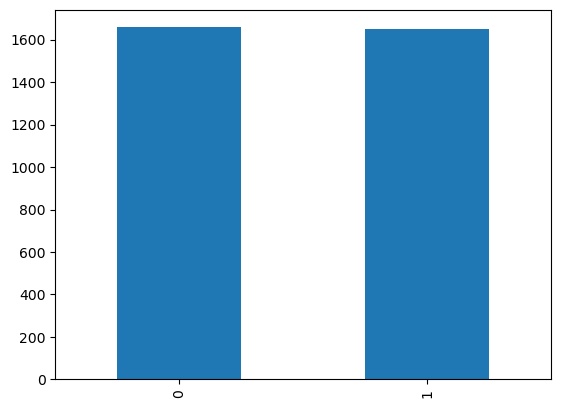

In [63]:
tpot_df['target'].value_counts().plot(kind='bar')

In [64]:
test_x_list = []
for i in range(len(test_df)):
    test_x_list.append(torch.cat([test_df['first_party'][i], test_df['second_party'][i], test_df['facts'][i]], dim =1))

for i in range(len(test_x_list)):
    test_x_list[i] = test_x_list[i][0].tolist()
    
    
test_tpot_df = pd.DataFrame(test_x_list, columns = [i for i in range(608)])
test_tpot_df

,0,1,2,3,4,5,6,7,8,9,...,598,599,600,601,602,603,604,605,606,607
0,101,5096,19139,102,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,101,23689,4059,17889,2022,2869,16102,1044,9654,2015,...,0,0,0,0,0,0,0,0,0,0
2,101,2053,1012,5718,1011,5388,2475,2516,1024,2976,...,0,0,0,0,0,0,0,0,0,0
3,101,7157,23699,102,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,101,16758,102,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1235,101,21404,6401,2473,1010,4297,1012,1010,3802,2632,...,0,0,0,0,0,0,0,0,0,0
1236,101,21311,102,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1237,101,8507,1037,1012,24713,1998,2198,1046,1012,5506,...,0,0,0,0,0,0,0,0,0,0
1238,101,2899,2110,6207,6475,3222,102,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
X = tpot_df.iloc[:,:608]
y = tpot_df.iloc[:,608]

tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42, n_jobs=-1)

tpot.fit(X, y)

y_pred = tpot.predict(test_tpot_df)

y_pred

Version 0.11.7 of tpot is outdated. Version 0.12.0 was released Thursday May 25, 2023.


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9026326494234225

Generation 2 - Current best internal CV score: 0.9114003775292403

Generation 3 - Current best internal CV score: 0.9114003775292403

Generation 4 - Current best internal CV score: 0.9114003775292403

Generation 5 - Current best internal CV score: 0.9516223245014649

Best pipeline: ExtraTreesClassifier(PCA(input_matrix, iterated_power=7, svd_solver=randomized), bootstrap=True, criterion=gini, max_features=0.9000000000000001, min_samples_leaf=1, min_samples_split=16, n_estimators=100)


array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [67]:
import pickle
import os

#save model
with open('tpot_model.pkl', 'wb') as f:
    pickle.dump(tpot.fitted_pipeline_, f)
    
X_test = test_tpot_df

y_test_pred = tpot.predict(X_test)

predict_df = pd.DataFrame(columns=['ID', 'first_party_winner'])

for idx in range(len(y_test_pred)):
    predict_df.loc[idx] = ['TEST_{0:04}'.format(idx), y_test_pred[idx]]
    

trials = 0
while True:
    if os.path.exists('submission/submission_{}.csv'.format(trials)):
        trials += 1
    else:
        predict_df.to_csv('submission/submission_{}.csv'.format(trials), index=False)
        break
    